# Avaliando o perfil de colaboradores que se desligaram da empresa

## Objetivo

O  foco  do  trabalho identificar a  possibilidade  de  previsao  de um funcionario pedir o
  desligamento da empresa  
  Esta  base foi  obtida  no site do **Kaggle**

  Para esse caso vamos aplicar as ferramentas: **Arvore de Decisao e Regressao Logistica**
  que sao **tecnicas supervisionadas de classificao**
  em que a variavel de interesse eh categorias/grupos em  uma  base  de  dados  real.

In [53]:
#carregando as bibliotecas necessárias
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Tirando Warnings do código
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('HR_comma_sep.csv', dtype={'left':'category'})
# Ao importar o dataset, já indicamos que nossa variável de saída é categórica.

In [55]:
# Renomeando variáveis.
df.rename(columns={"satisfaction_level":"nivel_satisfacao","last_evaluation":"ultima_avaliacao", "number_project":"numero_projetos", "average_montly_hours":"media_horas_mensal", "time_spend_company":"tempo_empresa", "Work_accident":"sofreu_acidente", "promotion_last_5years":"promocao_ultimos_5anos", "left":"demissao", "sales":"depto","salary":"salario"}, inplace=True)

In [56]:
#verificando se existe algum dano Null em nossa base de dados. 
df.isnull().any()

nivel_satisfacao          False
ultima_avaliacao          False
numero_projetos           False
media_horas_mensal        False
tempo_empresa             False
sofreu_acidente           False
demissao                  False
promocao_ultimos_5anos    False
depto                     False
salario                   False
dtype: bool

### Entendendo o Dataset

In [57]:
df.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,demissao,promocao_ultimos_5anos,depto,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Quantos colaboradores temos para cada departamento? 

In [48]:
df['depto'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: depto, dtype: int64

In [49]:
#vamos converter departamento e média salarial para variável numérica (Algumas funções não funcionam com strings)
df['depto'].replace(['sales','technical','support','IT','product_mng','marketing','RandD','accounting','hr','management'],[0,1,2,3,4,5,6,7,8,9], inplace = True)
df['salario'].replace(['low', 'medium', 'high'], [0,1,2], inplace=True)

In [50]:
df.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,demissao,promocao_ultimos_5anos,depto,salario
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [9]:
#vamos colocar o campo demissao em primeiro lugar, pois ele é muito importante

front = df['demissao']
df.drop(labels=['demissao'], axis=1, inplace=True)
df.insert(0, 'demissao', front)
df.head()

,demissao,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,promocao_ultimos_5anos,depto,salario
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [10]:
df.shape

(14999, 10)

In [11]:
df.dtypes

demissao                  category
nivel_satisfacao           float64
ultima_avaliacao           float64
numero_projetos              int64
media_horas_mensal           int64
tempo_empresa                int64
sofreu_acidente              int64
promocao_ultimos_5anos       int64
depto                        int64
salario                      int64
dtype: object

### Qual será a taxa de pedidos de demissão da empresa?

In [59]:
taxa_abandono = df.demissao.value_counts() /14999
taxa_abandono

0    0.761917
1    0.238083
Name: demissao, dtype: float64

### Podemos entender que a Taxa de abandono é de 23% 

### Overview baseado na coluna demissão

In [14]:
# Um Overview baseado na coluna demissão (Abandono pelas demais variáveis)

abandono_overview = df.groupby('demissao')
abandono_overview.mean()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,promocao_ultimos_5anos,depto,salario
demissao,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,2.739237,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,2.555587,0.414730


### Insights

    1- Podemos notar que pessoas que pedem demissão ou abandonam a empresa estão 22% menos satisfeitas
    2- As pessoas que pedem demissão trabalham em média de 8 a 10 horas dia / mês
    3- O número de projetos em que a pessoa está envolvida ou o tempo de empresa parecem não influenciar na decisão de abandono
    4- As pessoas que abandonam a empresa que tem uma taxa de promoção MUITO menor que aqueles que permanecem na empresa.
    5- O salário médio de quem abandona a empresa é muito menor.

In [16]:
#Uma visão mais estatistica do dataset

df.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,promocao_ultimos_5anos,depto,salario
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,2.695513,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.754845,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,5.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


### Será que existe correlação entre as variáveis? Vamos analizar a Correlation Matrix.

,nivel_satisfacao,ultima_avaliacao,numero_projetos,media_horas_mensal,tempo_empresa,sofreu_acidente,promocao_ultimos_5anos
nivel_satisfacao,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
ultima_avaliacao,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
numero_projetos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
media_horas_mensal,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
tempo_empresa,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
sofreu_acidente,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promocao_ultimos_5anos,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


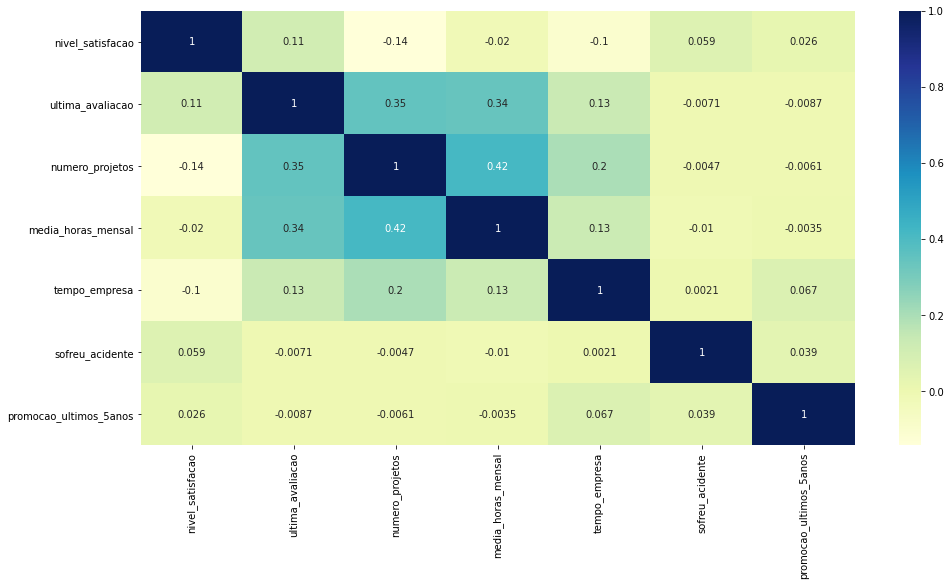

In [60]:
plt.figure(figsize= (16,8))

corr = df.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           cmap="YlGnBu", linewidths=0)
corr

### Insights

        1- Podemos dizer que existem correlações evidentes
        2-  (+) numero_projetos, numero de horas trabalhadas e a última avaliação
        3-  (-) volume de projetos, satisfação e salário

- Pode significar que os funcionários que passam mais horas e fazem mais projetos foram altamente avaliados.
- Mas a avaliação de recursos, quando comparada de forma independente com a rotatividade variável de resposta, mostra pouca ou nenhuma relação.

- O que significa? Para os relacionamentos negativos (-), o abandono, a satisfação e o salário são altamente correlacionados.
- As pessoas que tendem a deixar a empresa, mais quando estão menos satisfeitas e mal remuneradas.

<AxesSubplot:xlabel='depto'>

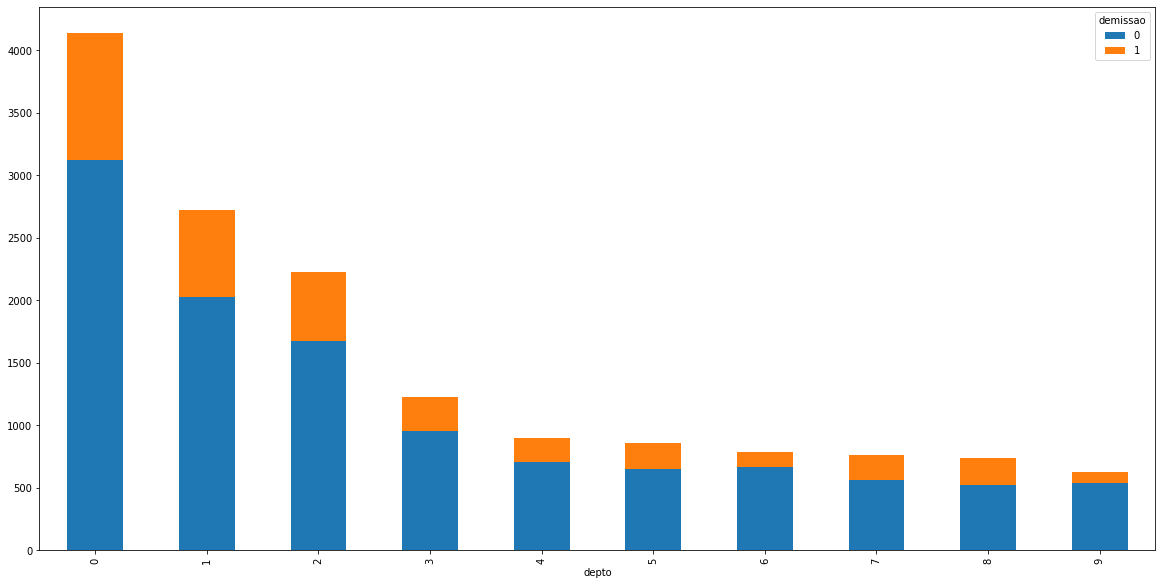

In [19]:
#departamento vs abandono
depto_abandono = pd.crosstab(index=df['depto'], 
                            columns=df['demissao'])
depto_abandono.plot(kind='bar',
                   figsize=(20,10),
                   stacked=True)



<AxesSubplot:xlabel='depto'>

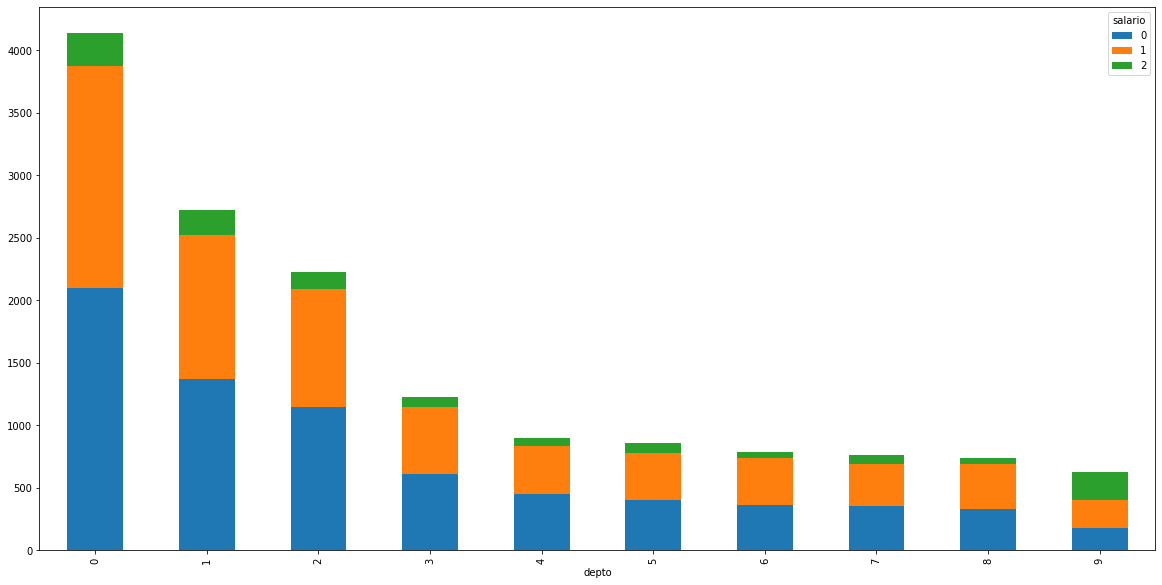

In [20]:
#departamento vs media salarial
depto_salario = pd.crosstab(index=df['depto'],
                            columns=df['salario'])
depto_salario.plot(kind="bar", figsize=(20,10), stacked=True)

### Perspectiva de crescimento na área de vendas é menor. Muitos colaboradores para poucas posições de liderança.

<AxesSubplot:xlabel='salario'>

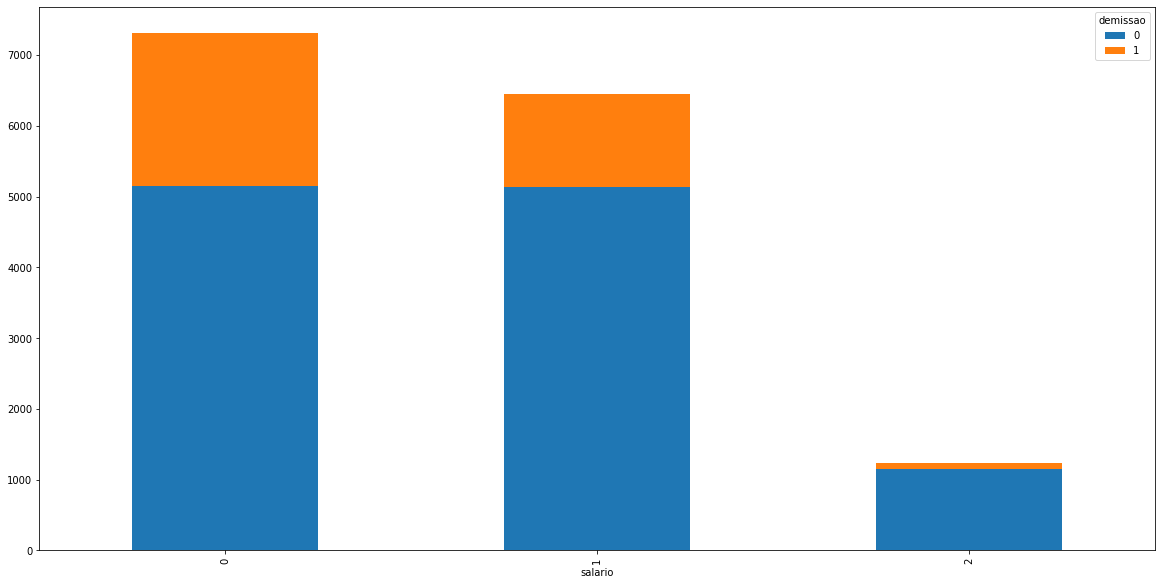

In [22]:
#Media salarial vs abandono
salario_abandono = pd.crosstab(index=df['salario'],
                            columns=df['demissao'])
salario_abandono.plot(kind="bar", figsize=(20,10), stacked=True)

<AxesSubplot:xlabel='promocao_ultimos_5anos'>

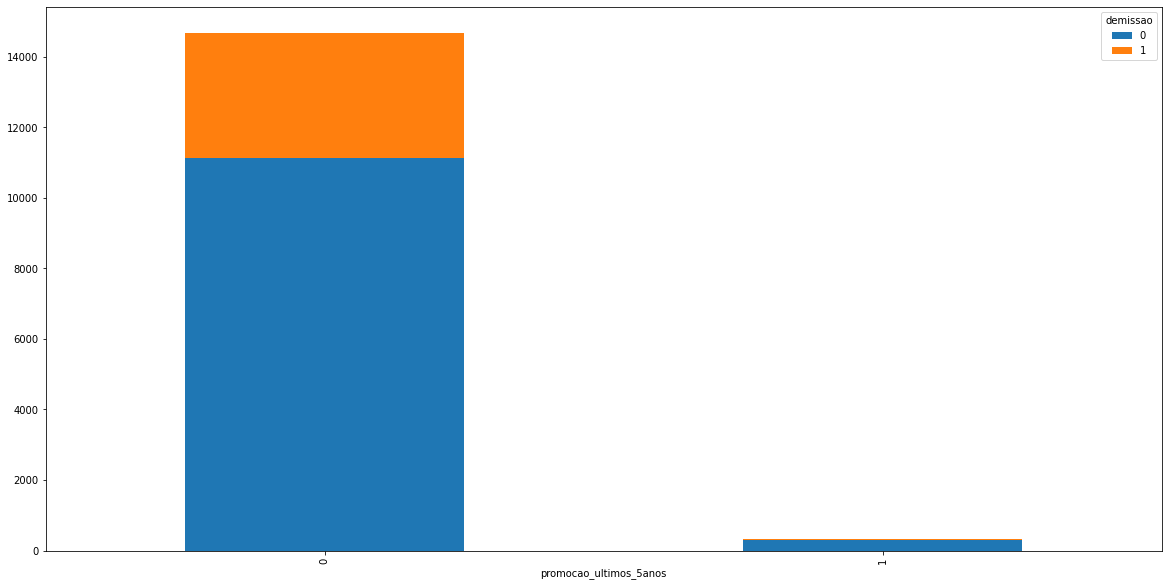

In [23]:
#promoção vs abandono
ult_promocao_demissao = pd.crosstab(index=df['promocao_ultimos_5anos'],
                            columns=df['demissao'])
ult_promocao_demissao.plot(kind="bar", figsize=(20,10), stacked=True)

### Ao que parece a maioria ou quase todos os empregados que saíram, não foram promovidos nos últimos 5 anos.

<AxesSubplot:ylabel='tempo_empresa'>

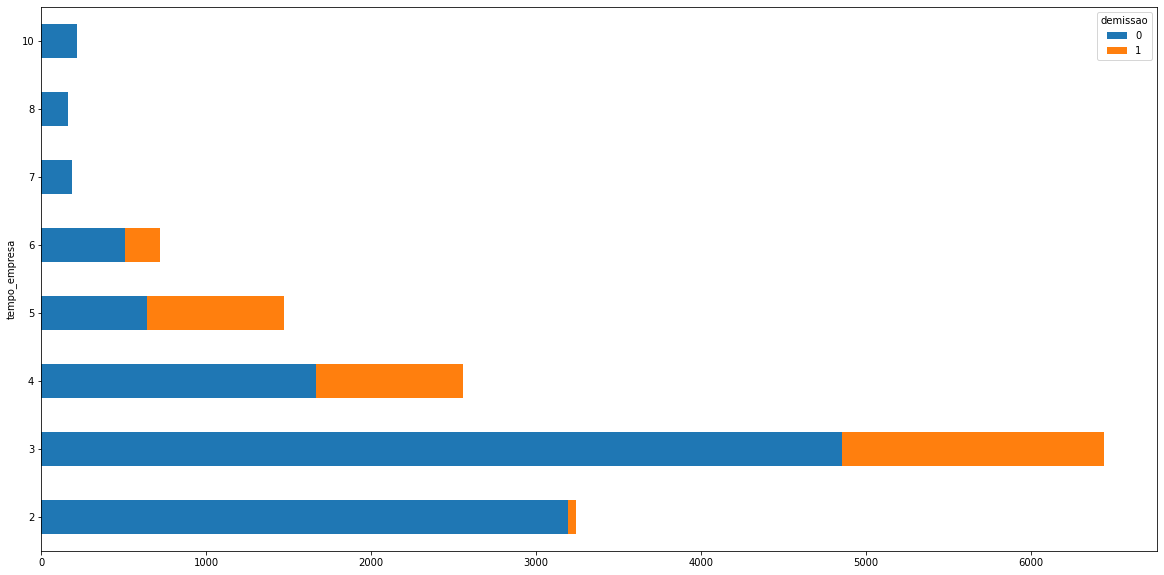

In [25]:
#Tempo de empresa vs abandono
tempo_empresa_demissao = pd.crosstab(index=df['tempo_empresa'],
                            columns=df['demissao'])
tempo_empresa_demissao.plot(kind="barh", figsize=(20,10), stacked=True)

### Insights
    1- A zona de perigo de abandono se dá entre 3 e 6 anos de empresa. (Nesta faixa, por que não apresentar propostas para motivar este grupo)
    2- Note que ninguém que tem de 7 a 10 anos de empresa, saiu da empresa.

<AxesSubplot:xlabel='numero_projetos'>

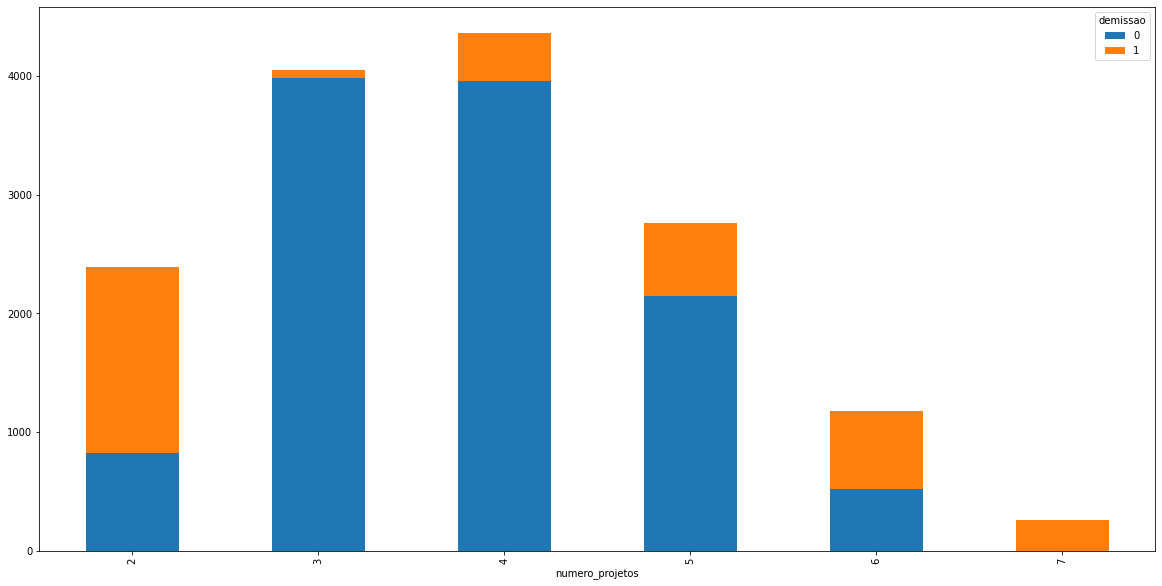

In [27]:
#Numero de projetos vs abandono
num_projetos_demissao = pd.crosstab(index=df['numero_projetos'],
                            columns=df['demissao'])
num_projetos_demissao.plot(kind="bar", figsize=(20,10), stacked=True)

### Insights    

    1- Pessoas envolvidas em 2 projetos, mais da metade pedem demissão. Será que elas se sentem desvalorizadas por trabalharem pouco?
    2- Praticamente todas as pessoas que trabalhavam em 7 projetos pediram demissão. (Quem é que aguenta 7 projetos sem estafar?)
    3- A partir de 4 projetos, o número de abandono/demissão aumenta conforme aumentam proporcionalmente à quantidade de projetos.
    4- Neste caso fica claro que 3 projetos é a quantidade ideal para reter um colaborador.

### Vamos verificar a relação entre ultima avaliação e pedido de demissão

Gráfico de densidade.

Text(0.5, 1.0, 'Última avaliação')

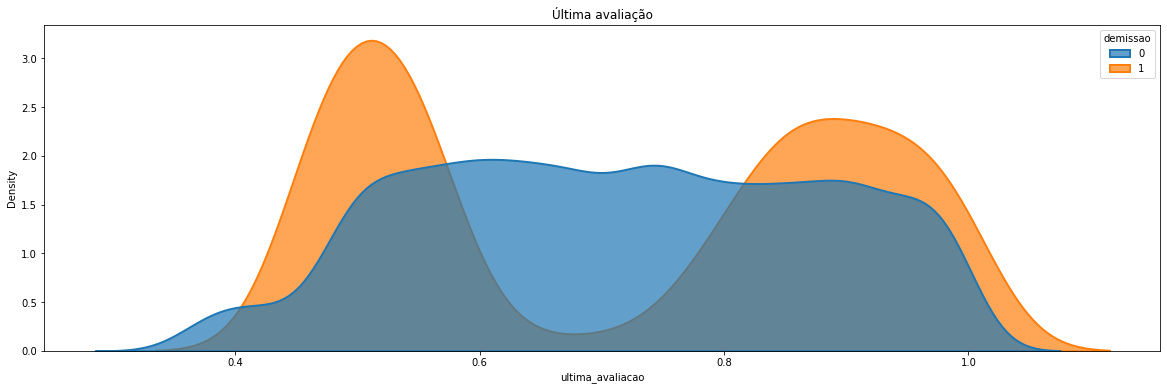

In [63]:
fig2 = plt.figure(figsize=(20,6),)
sns.kdeplot(
   data=df, x="ultima_avaliacao", hue="demissao",
   fill=True, common_norm=False, palette="tab10",
   alpha=.7, linewidth=2,
)
plt.title('Última avaliação')


### Vamos verificar a relação entre as horas e o abandono

Gráfico de densidade.

Text(0.5, 1.0, 'Media de horas mensais')

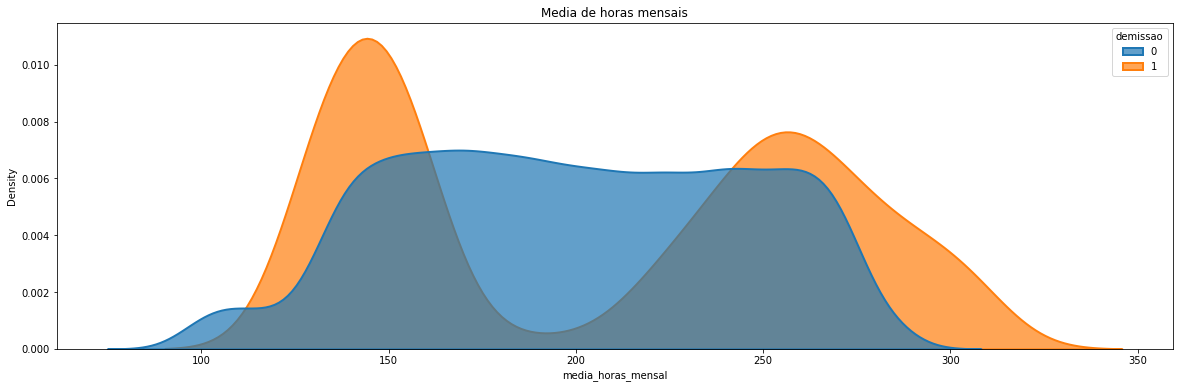

In [30]:
# Vamos motrar um gráfico de densidade.

fig2 = plt.figure(figsize=(20,6),)
sns.kdeplot(
   data=df, x="media_horas_mensal", hue="demissao",
   fill=True, common_norm=False, palette="tab10",
   alpha=.7, linewidth=2,
)
plt.title('Media de horas mensais')


### Insights

    1- Notamos outro bi-modal!
    2- Quem trabalhou de menos saiu juntamente com quem trabalhou de mais.

### Vamos verificar a relação entre a demissão e média de projetos

Text(0.5, 1.0, 'Distribuição do Nível de satisfação por demissão')

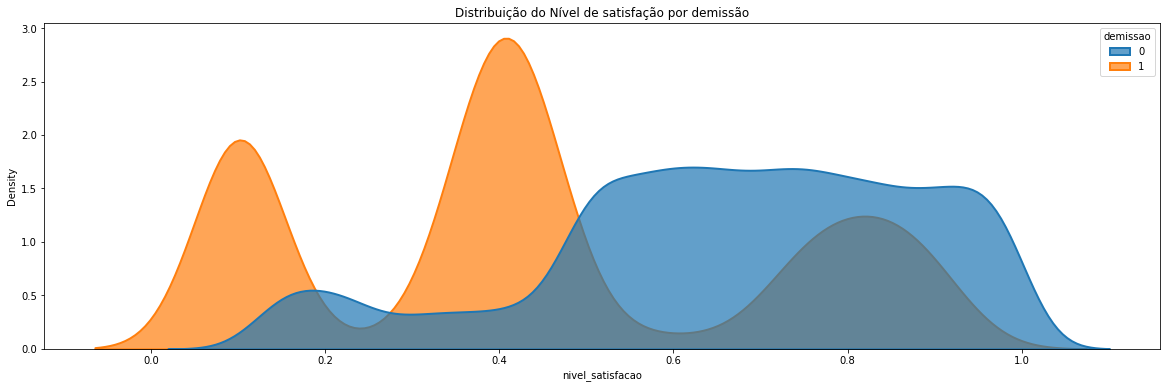

In [66]:
fig2 = plt.figure(figsize=(20,6),)
sns.kdeplot(
   data=df, x="nivel_satisfacao", hue="demissao",
   fill=True, common_norm=False, palette="tab10",
   alpha=.7, linewidth=2,
)
plt.title('Distribuição do Nível de satisfação por demissão')


### Quais são os grupos de colaboradores da minha base? 

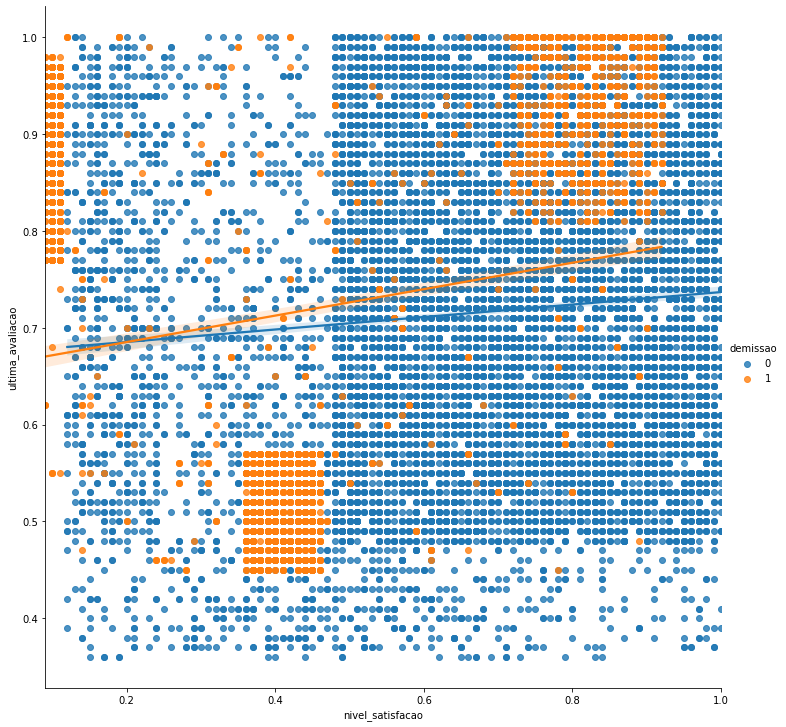

In [34]:
sns.lmplot(x='nivel_satisfacao', y='ultima_avaliacao', data=df,
          fit_reg=True, #Configurando linha de regressão
          hue='demissao',
            palette="tab10",
           height=10)

### Conclusão

#### São três personas que estão saindo da minha empresa.

        1- Pessoas que são muito boas, que estão extremamente insatisfeitas.
        2- Pessoas que são muito boas, que estão extremamente satisfeitas.
        3- Pessoas que são medianas, que estão mais ou menos satisfeitas.